## Introducció a l'aprenentatge profund (**Deep Learning**)

En este apartat aprendrem les bases per començar a construir les vostres pròpies xarxes neuronals amb Keras i Tensorflow. Aprendrem a:

- crear una arquitectura de xarxa neuronal completament connectada
- aplicar xarxes neuronals a dos problemes clàssics de ML: la regressió i la classificació
- entrenar xarxes neuronals amb descens de gradient estocàstic
- millorar el rendiment amb l'abandonament, la normalització de lots i altres tècniques
  
### Què és l'aprenentatge profund?
Alguns dels avenços més impressionants en intel·ligència artificial dels darrers anys han estat en el camp de l'aprenentatge profund. La traducció del llenguatge natural, el reconeixement d'imatges, la conducció o el joc automàtic són tasques on els models d'aprenentatge profund s'han acostat o fins i tot superat el rendiment humà.

L'aprenentatge profund és un enfocament de l'aprenentatge automàtic caracteritzat per piles profundes de càlculs. Aquesta profunditat de càlcul és el que ha permès que els models d'aprenentatge profund desenvolupen els tipus de patrons complexos i jeràrquics que es troben en els conjunts de dades del món real més desafiants.

Gràcies a la seva potència i escalabilitat, les xarxes neuronals s'han convertit en el model definitiu (almenys de moment) d'aprenentatge profund. Les xarxes neuronals estan formades per neurones, on cada neurona individualment només realitza un càlcul simple. El poder d'una xarxa neuronal prové, en canvi, de la complexitat de les connexions que aquestes neurones poden formar.

### La unitat bàsica: la neurona
Comencem amb el component fonamental d'una xarxa neuronal: **la neurona**. 

Gràficament, una neurona (o unitat) es pot representar de la següent forma:

![Neurona](../img/keras/neurona.png)

**L'entrada** és x. La seva connexió amb la neurona té un pes que és w, que és un factor que multiplica el valor (pot ser positiu o negatiu, si és zero, la connexió està desconnectada). Per a l'entrada x, el que arriba a la neurona és w * x. Una xarxa neuronal *aprén" modificant els pesos de les conexions entre neurones.

La b és un tipus especial de pes que anomenem biaix. El biaix no té cap dada d'entrada associada amb ell; en canvi, posem un 1 al diagrama de manera que el valor que arriba a la neurona siga només b (ja que 1 * b = b). El biaix permet a la neurona modificar l'eixida independentment de les seves entrades.

La y és el valor que finalment emet la neurona. Per obtenir la ixida, la neurona suma tots els valors que rep a través de les seves connexions. L'activació d'aquesta neurona és $y = w * x + b$. És l'equació d'una funció línial, una recta on:
   - w és la pendent
   - b és la intercepció amb l'eix y

#### Exemple - La neurona com a model
Tot i que les neurones individuals normalment només funcionaran com a part d'una xarxa més gran, sovint és útil començar amb un model de neurona única com a línia de base. Els models de neurona única són models lineals, com el de regressió liniar.

Pensem en com podria funcionar este model amb el [conjunt de dades de cereals](../data/keras/cereal.csv). Entrenant un model amb "sucre" (grams de sucre per ració) com a entrada i "calories" (calories per ració) com a eixida, podríem trobar que el biaix és b=90 i el pes és w=2,5. Podríem estimar el contingut calòric d'un cereal amb 5 grams de sucre per ració així:

![calories](../img/keras/calories.png)

$$
calories = 2.5 x 5 + 90 = 102.5
$$

#### Múltiples entrades
El conjunt de dades de cereals té moltes més característiques que només "sucre". Què passaria si volguerem ampliar el nostre model per incloure coses com el contingut de fibra o proteïnes? Això és prou fàcil. Només podem afegir més connexions d'entrada a la neurona, una per a cada característica addicional. Per trobar la ixida, multiplicaríem cada entrada pel seu pes de connexió i després les sumaríem totes.

![Neurona de multiples entrades](../img/keras/neurona_multiple_entrades.png)

La fórmula d'aquesta neurona seria $y=w0x0+w1x1+w2x2+b$. Una neurona amb dues entrades serà com un un plà, i una unitat amb més entrades seguira la forma d'un hiperpla (pla multidimensional).

#### Neurones a Keras

La manera més senzilla de crear un model a Keras és mitjançant keras.Sequential, que crea una xarxa neuronal com una pila de capes, on el senyal entre capes es passa de forma seqüencial. Podem crear models com els anteriors utilitzant una capa *Dense*, de la que continuarem parlant més endavant.

Podríem definir un model lineal que acceptara tres característiques d'entrada (`sugars`, `fiber` i `protein`) i produira una única eixida (`calories`) de la manera següent:



In [58]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])



Amb el primer argument, `units`, definim quantes eixides volem. En aquest cas, només estem predint `calories`, de manera que utilitzarem `units=1`.

Amb el segon argument, input_shape, diem a Keras les dimensions de les entrades. La configuració de input_shape=[3] garanteix que el model acceptarà tres característiques com a entrada (`sugars`, `fiber` i `protein`). Quan configureu l'argument input_shape, esteu dient a Keras les dimensions de la matriu que hauria d'esperar per a cada exemple de les dades d'entrenament. Configuració de input_shape=[3] crearia una xarxa que acceptés vectors de longitud 3, com [0.2, 0.4, 0.6].

Aquest model ja està preparat per ajustar-se a les dades d'entrenament.

<div class="admonition question">
  <p class="admonition-title">Per què input_shape és una llista de Python?</p>
  <p>
   Les dades que utilitzarem en aquest curs seran dades tabulars, com en un DataFrame de Pandas. Tindrem una entrada per a cada característica del conjunt de dades. Les característiques estan ordenades per columnes, de manera que sempre tindrem input_shape=[num_columns]. El motiu pel qual Keras utilitza una llista és per permetre l'ús de conjunts de dades més complexos. Per exemple, les dades d'imatge poden necessitar tres dimensions: [alçada, amplada, canals].
  </p>
</div>

#### Pesos en una xarxa no entrenada
Internament, Keras representa els pesos d'una xarxa neuronal amb tensors. Els tensors són bàsicament la versió de TensorFlow d'una matriu Numpy amb algunes diferències que els fan més adequats per a l'aprenentatge profund. Una de les diferències més importants és que els tensors estan preparats per accelerar els seus càlculs utilitzant GPUs (Graphics process units) i TPUs (Tensors process units). Les TPUs, de fet, estan dissenyades específicament per a càlculs de tensors. [Més informació de GPUs front a TPUs](https://fourweekmba.com/es/gpu-contra-tpu/)

Mira els pesos abans d'entrenar a la xarxa. Observa com canvien en cada execució al no definir una semilla.

In [59]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])
w, b = model.weights
print(f"Weights\n{w}\n\nBias\n{int(b)}")

Weights
<tf.Variable 'dense_35/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.8658098 ],
       [-0.6350461 ],
       [-0.81673557]], dtype=float32)>

Bias
0


Sembla que no hi ha cap patró en els valors que tenen els pesos. Abans d'entrenar el model, els pesos i el biaix s'estableixen en nombres aleatoris. Entrenar o ajustar la xarxa és trobar millors valors per als seus pesos.

Keras representa els pesos com a tensors, però també utilitza tensors per representar dades.

Els tipus de problemes que treballarem a aquest apartat seran problemes de regressió, on l'objectiu és predir algun objectiu numèric. Els problemes de regressió són com problemes d'ajustament de corbes: estem intentant trobar una corba que s'ajuste el millor possible a les dades. Fem una ullada a la "corba" produïda per un model lineal d'una sola neurona.

Hem esmentat que abans d'entrenar els pesos d'un model s'estableixen aleatòriament. Executeu la cel·la de sota unes quantes vegades per veure les diferents línies produïdes amb una inicialització aleatòria.

4/4 [==============================] - 0s 2ms/step


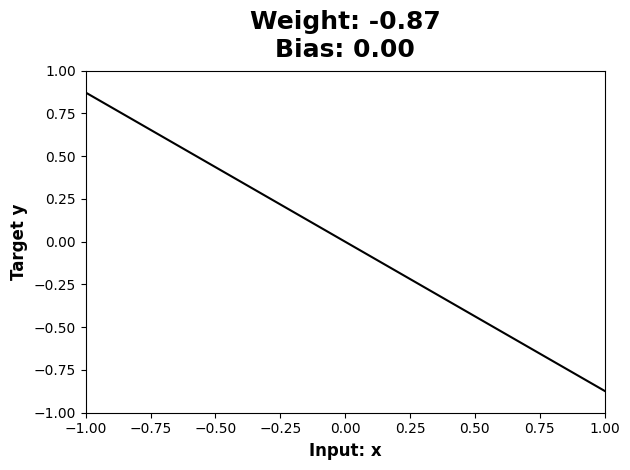

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## Xarxes neuronals profundes
En aquest apartat aprendres a construir xarxes neuronals capaces d'aprendre relacions més complexes per les quals són famoses les xarxes neuronals profundes.

La idea clau és la **modularitat**, la creació d'una xarxa complexa a partir d'unitats funcionals més senzilles. Hem vist com una unitat lineal calcula una funció lineal; ara veurem com combinar i modificar aquestes unitats individuals per modelar relacions més complexes.

### Capes (*Layers*)
Les xarxes neuronals solen organitzar les seves neurones en capes. Quan ajuntem unitats lineals que tenen un conjunt comú d'entrades, obtenim una capa densa.


![Xarxa neuronal](../img/keras/xarxa1.png)
<figcaption>Una capa densa de dues unitats lineals que reben dues entrades i un biaix.</figcaption>

Podeu pensar que cada capa d'una xarxa neuronal realitza algun tipus de transformació relativament senzilla. A través d'una pila profunda de capes, una xarxa neuronal pot transformar les seves entrades de maneres cada vegada més complexes. En una xarxa neuronal ben entrenada, cada capa és una transformació que ens acosta més a la solució.

<div class="admonition note">
  <p class="admonition-title">Molts tipus de capes</p>
  <p>
    Una capa a Keras és una cosa molt general. Una capa pot ser, essencialment, qualsevol tipus de transformació de dades. Moltes capes, com les capes convolucionals i recurrents, transformen les dades mitjançant l'ús de neurones i es diferencien principalment per les connexions entre elles. Altres s'utilitzen per a l'enginyeria de característiques o només per a aritmètica simple. Hi ha tot un món de capes per descobrir. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">TensorFlow Keras Layers Documentation</a>
  </p>
</div>


### La funció d'activació
Resulta que dues capes denses sense res pel mig no són millors que una sola capa densa. Les capes denses per si soles mai no ens poden treure del món de les línies i els plans. El que necessitem és funcions no lineals a les neurones. Aquestes funcions són el que s'anomenen **funcions d'activació**.

![Funcions d'activació](../img/keras/funcions_activacio.png)

<figcaption>Sense funcions d'activació, les xarxes neuronals només poden aprendre relacions lineals. Per ajustar les corbes, haurem d'utilitzar funcions d'activació.</figcaption>

Una **funció d'activació** és simplement una funció que apliquem a cadascuna de les ixides d'una capa (les seves activacions). La més comuna és la funció *rectificadora* max(0,x).

![Funció rectificadora](../img/keras/rectificadora.png)

La funció rectificadora té un gràfic que és una línia amb la part negativa *rectificada* o filtrada a zero. L'aplicació de la funció a les eixides d'una neurona transformarà la funció resultant, allunyant-nos de les línies simples.

Quan connectem el rectificador a una unitat lineal, obtenim una unitat lineal rectificada o ReLU (rectified liniar unit). (Per aquest motiu, és comú anomenar la funció rectificadora "funció ReLU"). Aplicar una activació ReLU a una unitat lineal significa que la ixida es transforma en max(0, w * x + b):

![ReLu](../img/keras/relu.png)

Hi ha tota una família de variants de l'activació 'relu' -- 'elu', 'selu' i 'swish', entre d'altres, totes les quals podem utilitzar a Keras. De vegades, una activació funcionarà millor que una altra en una tasca determinada, de manera que podriem plantejar-nos experimentar amb activacions mentre desenvolupem un model. L'activació de ReLU acostuma a funcionar bé en la majoria dels problemes, així que és una bona per començar.

Vegem els gràfics de les funcions d'activació anteriors.


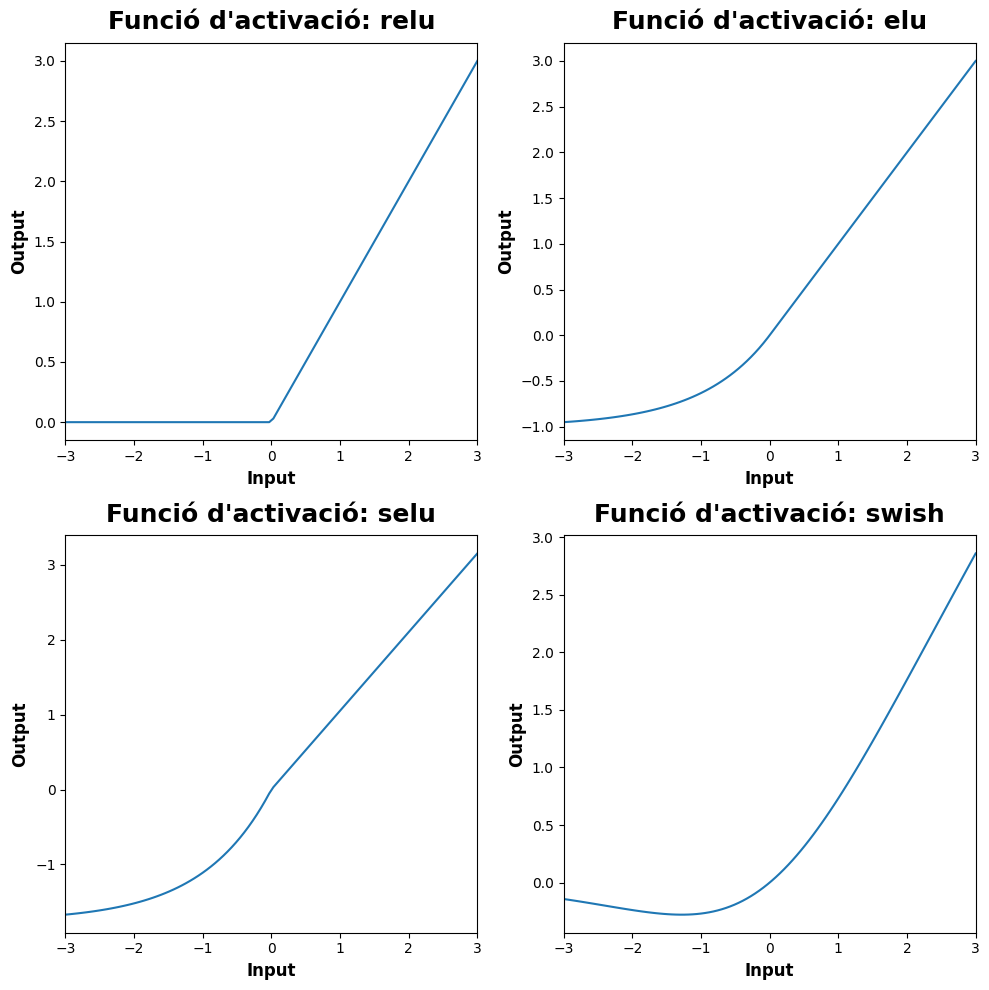

In [61]:
import seaborn as sns

# Defineix les funcions d'activació
activation_functions = ['relu', 'elu', 'selu', 'swish']

# Crea una figura amb 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Converteix la llista de subplots en una llista unidimensional
axs = axs.ravel()

for i, activation in enumerate(activation_functions):
    # Crea la capa d'activació
    activation_layer = layers.Activation(activation)

    # Crea un rang de valors d'entrada
    x = tf.linspace(-3.0, 3.0, 100)

    # Aplica la funció d'activació als valors d'entrada
    y = activation_layer(x)

    # Dibuixa la funció d'activació en el subplot corresponent
    axs[i].plot(x, y)
    axs[i].set_xlim([-3, 3])
    axs[i].set_title(f"Funció d'activació: {activation}")
    axs[i].set_xlabel('Input')
    axs[i].set_ylabel('Output')

# Mostra la figura amb tots els subplots
plt.tight_layout()
plt.show()


### Apilament de capes denses
Ara que tenim una certa no linealitat, vegem com podem apilar capes per obtenir transformacions de dades complexes.

![stack](../img/keras/stack.png)

Les capes anteriors a la capa de ixida de vegades s'anomenen ocultes, ja que mai veiem directament les seves ixides.

Ara, observeu que la capa final (de ixida) és una unitat lineal (és a dir, sense funció d'activació). Això fa que aquesta xarxa siga adequada per a una tasca de regressió, on estem intentant predir algun valor numèric arbitrari. Altres tasques (com la classificació) poden requerir una funció d'activació a la ixida, com per exemple una sigmoide que ens donarà un valor entre 0 i 1, molt útil per a classificació binària.

### Construcció de models seqüencials
El model seqüencial que hem estat utilitzant connectarà una llista de capes en ordre:
- la primera capa rep l'entrada
- l'última capa produeix la ixida. 

Vegem el codi per a construir una xarxa neuronal com la de la figura anterior:

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

## Descens del gradient estocàstic (Stochastic Gradient Descent o SGD)
Fins ara hem construit xarxes completament connectades a partir de piles de capes denses. Quan es crea per primera vegada, tots els pesos de la xarxa s'estableixen aleatòriament; la xarxa encara no *sap* res. Ara veurem com entrenar una xarxa neuronal per a que *aprenga*.

El procés és el mateix que per a qualsevol algorisme de Machine Learning:
- comencem amb un conjunt de dades d'entrenament
- seleccionem les característiques d'entrada i el *target*
- entrenem la xarxa, ajustant els seus pesos de manera que puga transformar les entrades en ixedes o les característiques en l'objectiu

Al conjunt de dades de cereals, per exemple, volem una xarxa que puga aprendre el contingut de `sugars`, `fiber` i `protein` de cada cereal i produir una predicció de les `calories` d'aquest cereal. Si podem entrenar una xarxa amb èxit per fer-ho, els seus pesos han de representar d'alguna manera la relació entre aquestes característiques i aquest objectiu.

A més de les dades d'entrenament, necessitem dues coses més:
- una "funció de pèrdua" o *loss function* que mesure com de bones són les prediccions de la xarxa neuronal.
- un "optimitzador" o *optimizer* que indique a la xarxa com canviar els seus pesos per intentar millorar.
  
### La funció de pèrdua
Hem vist com dissenyar una arquitectura per a una xarxa, però no hem vist com dir-li a una xarxa quin problema ha de resoldre. Aquesta és la feina de la funció de pèrdua.

La funció de pèrdua mesura la disparitat entre el valor real de l'objectiu i el valor que prediu el model.

Els diferents problemes requereixen diferents funcions de pèrdua. Hem estat examinant problemes de regressió, on la tasca és predir algun valor numèric: calories en cereals o preu de la vivenda.

Una funció de pèrdua comuna per als problemes de regressió és l'error absolut mitjà o MAE, que ja estudiarem a l'apartat de *sklearn*. Per a cada predicció y_pred, MAE mesura la disparitat de l'objectiu real y_true mitjançant una diferència absoluta abs (y_true - y_pred).

La pèrdua total de MAE en un conjunt de dades és la mitjana de totes aquestes diferències absolutes.

![MAE](../img/keras/mae.png)

A més de MAE, altres funcions de pèrdua que podem utilitzar per a problemes de regressió són l'error quadrat mitjà (MSE) o la pèrdua de Huber (ambdues disponibles a Keras).

Durant l'entrenament, el model utilitzarà la funció de pèrdua com a guia per trobar els valors correctes dels seus pesos (més baixa és millor). En altres paraules, la funció de pèrdua indica a la xarxa el seu objectiu i l'ajuda, a través de l'optimitzador, anar millorant.

### L'optimitzador `descens del gradient estocàstic` o SGD
Hem descrit el problema que volem que resolgui la xarxa, però ara hem de dir com resoldre'l. Aquesta és la feina de l'optimitzador. L'optimitzador és un algorisme que ajusta els pesos per minimitzar el valor de la funció de pèrdua.

Pràcticament tots els algorismes d'optimització utilitzats en l'aprenentatge profund pertanyen a una família anomenada descens de gradient estocàstic. Són algorismes iteratius que entrenen una xarxa en passos. Un pas de l'aprenentatge es produeix així:

- Mostra algunes dades d'entrenament i executa-les a través de la xarxa per fer prediccions.
- Mesura la pèrdua entre les prediccions i els valors reals.
- Ajusteu els pesos en una direcció que faça que la pèrdua siga menor.
- Repetiu els passos anteriors una i altra vegada fins que la pèrdua siga menor del que volem (o fins que no disminuixca més).

![SGD](../img/keras/SGD.gif)

La mostra de dades d'entrenament de cada iteració s'anomena `minibatch`, `batch` o lot (ve del processament per lots als primers ordinadors), mentre que una ronda completa de dades d'entrenament s'anomena `epoch`. El nombre d'epochs és quantes vegades la xarxa veurà cada exemple d'entrenament, quantes passades amb totes les dades farà per a ajustar-se.

L'animació mostra un model lineal aplicat al datasets de cereals entrenat amb SGD. Els punts rojos clars representen tot el conjunt d'entrenament, mentre que els punts rojos més oscurs són els minibatch. Cada vegada que SGD veja un minibatch nou, canviarà els pesos (w el pendent i b la intercepció en Y) cap a valors més precisos en aquest lot. Lot rere lot, la línia finalment va convergint cap a ajustos millors. Podeu veure que la pèrdua es redueix a mesura que els pesos s'acosten als seus valors reals.

### Taxa d'aprenentatge i mida del lot
Tingueu en compte que la línia només fa un xicotet desplaçament per a cada lot. La mida d'aquests torns ve determinada per la taxa d'aprenentatge. Una taxa d'aprenentatge més xicoteta significa que la xarxa ha de veure més minilots abans que els seus pesos convergin als seus millors valors.

La taxa d'aprenentatge i la mida dels minilots són els dos paràmetres que tenen un efecte més gran sobre com es desenvolupa l'entrenament amb SGD. La seva relació és subtil i l'elecció correcta per a aquests paràmetres no sol ser òbvia.

Afortunadament, per a la majoria de problemes no serà necessari fer una búsqueda extensa d'hiperparàmetres per obtindre resultats satisfactoris. 

Adam és un algorisme SGD que té una taxa d'aprenentatge adaptativa, va variant per sí mateixa a mesura que es convergeix cap a la solució. Això el fa adequat per a la majoria de problemes sense cap ajustament de paràmetres, ja que en cert sentit s'autoajusta. Adam és un gran optimitzador de propòsit general.

### Afegint la funció de pèrdua i l'optimitzador
Després de definir un model, podeu afegir una funció de pèrdua i un optimitzador amb el mètode `compile` del model:

```python
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Tingueu en compte que podem especificar la funció de pèrdua i l'optimitzador passant-li només una cadena de texta. També podriem definir els nostres objectes personalitzats per poder ajustar els seus paràmetres. Però de moment utilitzarem els paràmetres predeterminats que funcionen bé.


<div class="admonition note">
  <p class="admonition-title">SGD</p>
  <p>
    El gradient és un vector que ens indica en quina direcció han d'anar els pesos. Més precisament, ens indica com canviar els pesos perquè la pèrdua varie més ràpidament. Anomenem descens del gradient al nostre procés perquè utilitza el gradient per baixar la corba de pèrdua cap al mínim. Estocàstic significa *determinat per l'atzar*. El nostre entrenament o ajust és estocàstic perquè els lots són mostres aleatòries del conjunt de dades. I per això es diuen a este conjunt d'algorismes SGD.
  </p>
</div>



### Preparació de les dades

En la majoria de casos, abans de passar les dades a entrenament, necessitem preparar-les per a que la xarxa convergisca a uns valors i a més ho faça en el menor temps possible. 

Depenent de la situació i del tipus de dades amb les quals estigues treballant aplicarem unes tècniques o altres. Dues de les tècniques més utilitzades són:

- **la normalització** min-max (on les dades es reescalen per estar dins de l’interval [0,1]. És útil quan les dades representen números grans o quan saps que tenes límits (com el color d'un píxel d’una imatge que està entre 0 i 255)
- **l’estandardització**, on les dades es centren per tindre una mitjana de zero i es reescalen per tindre una desviació estàndard d’ú. És útil quan les teues dades seguixen una distribució gaussiana (o similar) i vols que la mitjana siga zero i la desviació estàndard siga un. Aquesta tècnica és menys sensible als valors atípics que la normalització min-max.

Estes tècniques ens proporcionen molts avantatges, com:

1. **Evitar l’explosió de gradients**: Si les dades tenen una escala gran, els gradients poden tindre valors molt grans i provocar que l’aprenentatge siga inestable o fins i tot falle. 

2. **Accelerar l’aprenentatge**: Quan totes les característiques estan a la mateixa escala, la superfície d’error és més “uniforme” i el gradient descendent pot convergir més ràpidament.

3. **Evitar el biaix de característiques**: Si una característica té una escala molt més gran que una altra, la xarxa neuronal pot donar més importància a la característica de gran escala simplement perquè els seus valors són més grans, no perquè aporte més informació al model.

4. **Facilitar la comparació lineal de característiques**.

<div class="admonition warning">
  <p class="admonition-title">Ajustament de les dades</p>
  <p>
    Ajusta l’escalador només amb les dades d’entrenament, però transforma tant les dades d’entrenament com les de prova. Si ajustes l’escalador utilitzant tot el conjunt de dades abans de dividir, les dades de prova podrien influir en com s’ajusta l’escalador, cosa que podria portar a resultats optimistes i enganyosos quan valides el model.
  </p>
</div>



## Subajust i sobreajust
A l'apartat anterior hem vist que keras manté un historial de la pèrdua d'entrenament i validació durant les èpoques en què està entrenant el model. Anem a interpretar aquestes corbes d'aprenentatge i com les podem utilitzar per guiar el desenvolupament del model. En particular, examinarem les corbes d'aprenentatge per trobar proves de subajust i sobreajust i analitzarem un parell d'estratègies per corregir-ho, tal com vam fer amb algoritmes de ML amb sklearn.

### Corbes de `loss` i `val_loss`
Podrem pensar que la informació de les dades d'entrenament és de dos tipus: senyal i soroll. 
- El senyal és la part que generalitza, la part que pot ajudar el nostre model a fer prediccions a partir de dades noves, la part que aporta informació al model
-  El soroll és aquella part que només és certa de les dades d'entrenament però no en les de validació. És tota la fluctuació aleatòria que prové de les dades del món real o de tots els patrons incidentals i no informatius que en realitat no poden ajudar el model a fer prediccions. El soroll és la part que pot semblar útil, però realment no ho és.

Entrenem un model que s'autoajusta els seus pesos o paràmetres per minimitzar els valors de la funció de pèrdua en un conjunt d'entrenament. Però, com ja sabem, per avaluar amb precisió el rendiment d'un model, hem d'avaluar-lo en un nou conjunt de dades, les dades de validació o test.

Quan hem entrenat el model, hem traçat la pèrdua en el conjunt d'entrenament i validació època per època(*loss* i *val_loss*). Aquests gràfics s'anomenem **corbes d'aprenentatge**. Per entrenar models d'aprenentatge profund de manera eficaç, hem de ser capaços d'interpretar-les.

![Corbes](../img/keras/corbes.png)
<figcaption>La funció de pèrdua en dades de validació proporciona una estimació de l'error esperat en dades no entrenades.</figcaption>


Ara, `loss` disminuirà quan el model aprenga del senyal i quan aprenga del soroll. Però `val_loss` sols disminuirà quan el model aprenga del senyal, ja que siga quin siga el soroll que el model haja aprés del conjunt d'entrenament, no es generalitzarà a dades noves. Així, quan un model aprén del senyal, ambdues corbes baixen, però quan aprén soroll es crea un buit a les corbes. La mida de la bretxa, la diferència entre corbes, indica quant de soroll ha aprés el model.

L'ideal seria crear models que aprenguen tot del senyal i res del soroll. Això no passarà mai. En canvi fem un balanç, podem aconseguir que el model aprenga més senyal a costa d'aprendre més soroll. Mentre el balanç siga a favor nostre, la pèrdua de validació continuarà disminuint. Però passat un cert moment el balanç pot tornar-se en contra nostra, el cost superar el benefici i la pèrdua de validació comença a augmentar.

![Alt text](../img/keras/balan%C3%A7.png)
<figcaption>Subajust i sobreajust</figcaption>

Aquesta compensació indica que poden haver-hi dos problemes que es produeixen en entrenar un model: falta de senyal o massa soroll. L'ajustament insuficient o subajustament del conjunt d'entrenament es produeix quan la pèrdua no és tan baixa com podria ser perquè el model no ha aprés prou senyal. Sobreajustar el conjunt d'entrenament és quan la pèrdua no és tan baixa com podria ser perquè el model ha aprés massa soroll. 

<div class="admonition tip">
  <p class="admonition-title">Balanç</p>
  <p>
    El truc per formar models d'aprenentatge profund és trobar el millor equilibri entre els dos.
  </p>
</div>


Veurem un parell de maneres d'obtenir més senyal de les dades d'entrenament alhora que reduïm la quantitat de soroll.



### Capacitat (*Capacity*)
**La capacitat** d'un model es refereix a la mida i complexitat dels patrons que és capaç d'aprendre. Per a les xarxes neuronals, això estarà determinat en gran manera per quantes neurones tinga i com estan connectades entre elles. Si sembla que la vostra xarxa no està ajustada a les dades, hauríeu d'intentar augmentar la capacitat.

Podem augmentar la capacitat d'una xarxa fent-la més àmplia (més unitats a les capes existents) o fent-la més profunda (afegint més capes). Les xarxes més àmplies tenen més facilitat per aprendre relacions més lineals, mentre que les xarxes més profundes prefereixen les relacions no lineals. 

**Què és millor només depén del conjunt de dades.**

In [63]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

Explorarem com la capacitat d'una xarxa pot afectar el seu rendiment a les tasques.

### Parada anticipada (*Early Stopping*)
Hem esmentat que quan un model està aprenent amb massa soroll, la pèrdua de validació pot començar a augmentar durant l'entrenament. Per evitar-ho, simplement podem parar l'entrenament sempre que sembli que la pèrdua de validació ja no disminueix. Interrompre l'entrenament d'aquesta manera s'anomena parada anticipada.

![Early stopping](../img/keras/early_stop.png)
<figcaption>Parem l'entrenament quan la pèrdua de validació està al mínim</figcaption>

Una vegada detectem que la pèrdua de validació comença a augmentar de nou, podem restablir els pesos al punt on es va produir el mínim. Això assegura que el model no continuarà aprenent soroll i sobreadaptant les dades.

Entrenar amb parada anticipada també significa que correm menys perill de parar l'entrenament massa prompte, abans que la xarxa haja acabat d'aprendre el senyal. Així, a més d'evitar que l'excés d'adaptació s'entrene massa temps, la parada anticipada també pot evitar que l'adaptació insuficient no s'entrene el temps suficient. 

<div class="admonition tip">
  <p class="admonition-title">Ús de parada anticipada</p>
  <p>
    Per tant, configureu les vostres èpoques d'entrenament en un nombre gran (més del que necessitareu) i la parada anticipada s'encarregarà de parar el model en un punt òptim.
  </p>
</div>


### Codifiquem la parada anticipada
A Keras, incloem la parada anticipada mitjançant una funció de *callback*. 

<div class="admonition note">
  <p class="admonition-title">Ús de parada anticipada</p>
  <p>
    Una funció de *callback* és només una funció que es passa com a argument a una altra funció i que s'executarà en produir-se un esdeveniment.
  </p>
</div>

Al nostre cas, la funció de *callback* d'*early stopping* s'executarà després de cada època. Keras té un conjunt de funcions de *callback* predefinides i molt útils, però també podeu definir les vostres pròpies funcions.

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Al codi anterior:
Si no hi ha hagut almenys una millora de 0,001 en la pèrdua de validació (`min_delta`) durant les 20 èpoques anteriors (`patience`), aleshores atura l'entrenament i mantén el millor model que has trobat (`restore_best_weights`)". De vegades pot ser difícil saber si la pèrdua de validació augmenta a causa d'un sobreajustament o només per una variació aleatòria del lot. Els paràmetres ens permeten establir alguns límits al voltant de quan aturar l'entrenament.

Com veurem al nostre exemple, passarem aquesta funció de *callback* al mètode fit juntament amb la pèrdua i l'optimitzador.

### Activitat 1

En este moment hauries de realitzar l'[activitat 1](../exercicis/keras/01_underfitting_overfitting/).

## `Dropout` (abandonament) i `Batch Normalization` (normalització de lots)
Hi ha molts tipus de capes a banda de les capes denses que podem utilitzar amb keras. Alguns tipus de capes són semblants a les capes denses i defineixen connexions entre neurones, però altres poden fer preprocessament o transformacions sobre les dades.

En aquest apartat, aprendrem sobre dos tipus de capes especials, que no contenen neurones, però que afegeixen alguna funcionalitat que de vegades pot beneficiar un model de diverses maneres. Tots dos tipus s'utilitzen habitualment en arquitectures modernes.

### Dropout
El *dropout* pot ajudar a corregir el sobreajustament.

Durant l’entrenament d’una xarxa neuronal, el “dropout” es realitza de manera que a cada pas d’entrenament, cada neurona (incloent les neurones d’entrada) té una probabilitat, diguem p, de ser temporalment “desactivada” o ignorada durant aquest pas. Això significa que contribuirà amb zero a la suma total en la següent capa, en lloc del seu valor normal. La probabilitat p és un hiperparàmetre que es pot ajustar.

La idea principal darrere del dropout és que, al forçar a la xarxa a perdre informació, es fa més difícil per a qualsevol neurona dependre fortament de l’entrada d’altres neurones, ja que aquestes entrades poden ser desactivades en qualsevol moment durant l’entrenament.

Dit d'una altra manera, eliminem aleatòriament una part de les unitats d'entrada d'una capa a cada pas de l'entrenament, cosa que fa que siga molt més difícil que la xarxa aprenga patrons falsos a les dades d'entrenament. En lloc d'això, ha de buscar patrons amplis i generals, els patrons de pes dels quals solen ser més robusts.

Això ajuda a prevenir el sobreajustament i fa que la xarxa siga més robusta.

![dropout](../img/keras/dropout.gif)

<figcaption>50% de dropout entre les dues capes ocultes</figcaption>

També podem pensar en l'abandonament com la creació d'una espècie de conjunt de xarxes. Les prediccions ja no seran fetes per una gran xarxa, sinó per un comité de xarxes més xicotetes. Els individus del comité tendeixen a cometre diferents tipus d'errors, però tenen raó al mateix temps, fent que el comité en conjunt siga millor que qualsevol individu. És la mateixa idea que hi ha darrere del *RandomForest* o boscos aleatoris com a conjunt d'arbres de decisió.

### Codificant abandonament
A Keras, l'argument de la taxa d'abandonament defineix quin percentatge de les unitats d'entrada cal desactivar. Col·loquem la capa d'abandonament just abans de la capa a la qual volem aplicar l'abandonament:

```python
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

### Activitat 2
En este moment hauries de realitzar l'[activitat 2](../exercicis/keras/02_dropout/).

### Normalització de lots
La següent capa especial que veurem realitza la "normalització per lots" (o "batchnorm"), que pot ajudar a corregir l'entrenament que és lent o inestable.

Ja vam explicar que és millor normalitzar les dades utilitzant l'StandardScaler o el MinMaxScaler de scikit-learn abans d'entrenar un model d'IA. El motiu és que SGD canviarà els pesos de la xarxa en proporció a la quantitat d'activació que produeixen les dades. Les característiques que tendeixen a produir activacions de mides molt diferents poden provocar un comportament d'entrenament inestable.

Ara bé, si és bo normalitzar les dades abans que entren a la xarxa, potser també seria millor normalitzar dins de la xarxa. De fet, tenim un tipus especial de capa que pot fer-ho, la capa de normalització per lots. Una capa de normalització de lots mira cada lot a mesura que arriba, primer normalitza el lot amb la seua pròpia mitjana i desviació estàndard i, a continuació, posa les dades a una escala nova amb dos paràmetres de redimensionament entrenables. Batchnorm, en efecte, realitza una mena de redimensionament coordinat de les seues entrades.

Moltes vegades, batchnorm s'afegeix com a ajuda per al procés d'optimització, tot i que de vegades també pot ajudar al rendiment de la predicció. Els models amb batchnorm solen necessitar menys èpoques per completar l'entrenament. A més, batchnorm també pot solucionar diversos problemes que poden fer que l'entrenament quede "encallat". Penseu en afegir normalització per lots als vostres models, sobretot si teniu problemes durant l'entrenament.

### Codifiquem la normalització de lots
La normalització de lots es pot utilitzar en gairebé qualsevol punt de la xarxa. El pots posar després d'una capa...

```python
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

... entre una capa i la seua funció d'activació:

```python
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

<div class="admonition tip">
  <p class="admonition-title">Batch Normalization com a primera capa</p>
  <p>
    Si afegiu com a primera capa de la vostra xarxa una normalització de lots, pot actuar com una espècie de preprocessador adaptatiu, substituint l'StandardScaler de Sci-Kit Learn.

    ```python
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    ```
  </p>
</div>


### Activitat 3

En este moment hauries de realitzar l'[activitat 3](../exercicis/keras/03_batch_normalization/).

## Exemples



### Exemple I: Regressió - Qualitat del vi tinto
Ara ja sabem tot el que necessitem per començar a entrenar models d'aprenentatge profund. Així que anem a aplicar-ho. Utilitzarem el [dataset de qualitat del vi tinto](../data/keras/red-wine.csv).

Aquest dataset consisteix en mesures fisioquímiques d'uns 1600 vins tintos portuguesos. També s'inclou una qualificació de qualitat per a cada vi a partir de proves de gust a cegues. 

Podriem predir la qualitat percebuda d'un vi a partir d'aquestes mesures?


#### Preparem les dades
En aquest fragment de codi, preparem les dades:

In [65]:
import pandas as pd

red_wine = pd.read_csv('data/keras/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = red_wine.drop(['quality'], axis=1)
y = red_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

# Reescalat de les dades
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ara anem a construir la xarxa neuronal. Anem a construir una xarxa neuronal amb 1500 neurones, que deuria ser capaç de trobar patrons a les nostres dades. 

Com les característiques són 11, la nostra xarxa tindrà 11 entrades.

L'eixida serà linial, per tant, no cal especificar funció d'activació a la capa d'eixida.

In [67]:
X_train.shape

(1119, 11)

#### Definim l'arquitectura de la xarxa

In [68]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Decidir l'arquitectura del nostre model hauria de formar part del procés. Començariem amb una arquitectura senzilla i utilitzem la funció de pèrdua amb les dades de test com a guia. Aprendrem més sobre el desenvolupament del model a les tasques.



#### Compilació

Després de definir el model, compilem amb l'optimitzador i la funció de pèrdua.

In [69]:
model.compile(
    optimizer='adam',
    loss='mae',
)

#### Entrenament

Ara estem preparats per començar l'entrenament. 

Indicarem a Keras que *alimente* l'optimitzador amb 256 files de dades d'entrenament alhora (`batch_size=256`) i que ho faça 10 vegades utilitzant tot el conjunt de dades (`epoch=10`).

In [70]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
5/5 [==============================] - 1s 115ms/step - loss: 4.3064 - val_loss: 1.3367
Epoch 2/20
5/5 [==============================] - 0s 60ms/step - loss: 1.4017 - val_loss: 1.0116
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 1.0399

5/5 [==============================] - 0s 58ms/step - loss: 1.0399 - val_loss: 1.0670
Epoch 4/20
5/5 [==============================] - 0s 66ms/step - loss: 0.9347 - val_loss: 0.6648
Epoch 5/20
5/5 [==============================] - 0s 69ms/step - loss: 0.7911 - val_loss: 0.7203
Epoch 6/20
5/5 [==============================] - 0s 89ms/step - loss: 0.7851 - val_loss: 0.8711
Epoch 7/20
5/5 [==============================] - 0s 60ms/step - loss: 0.7989 - val_loss: 0.5976
Epoch 8/20
5/5 [==============================] - 0s 70ms/step - loss: 0.7145 - val_loss: 0.7231
Epoch 9/20
5/5 [==============================] - 0s 56ms/step - loss: 0.6886 - val_loss: 0.5372
Epoch 10/20
5/5 [==============================] - 0s 51ms/step - loss: 0.6276 - val_loss: 0.5565
Epoch 11/20
5/5 [==============================] - 0s 38ms/step - loss: 0.5919 - val_loss: 0.5490
Epoch 12/20
5/5 [==============================] - 0s 45ms/step - loss: 0.5674 - val_loss: 0.5824
Epoch 13/20
5/5 [=====================

#### Observem les corbes d'aprenentatge

Podeu veure que Keras ens manté informat de l'evolució de l'ajust a mesura que el model s'entrena.

<div class="admonition note">
  <p class="admonition-title">`loss` front a `val_loss`</p>
  <p>
    `Loss` és el valor de la funció de cost per a le dades d'entrenament, mentre que `val_loss` és el valor de la funció de cost per a les dades de validació.
  </p>
</div>

<details class='success'>
  <summary>Què passa si val_loss augmenta el seu valor a partir d'un epoch mentre loss continua disminuint?</summary>
    <p>
      El model comença a sobreentrenar-se.
    </p>
</details>

Però una manera millor de veure la pèrdua és dibuixar-la. El mètode `fit`, de fet, manté un registre de la pèrdua produïda durant l'entrenament en un objecte `History`. Les dades d'aquest objecte les convertirem a un DataFrame de `Pandas`, per facilitar les representacions.

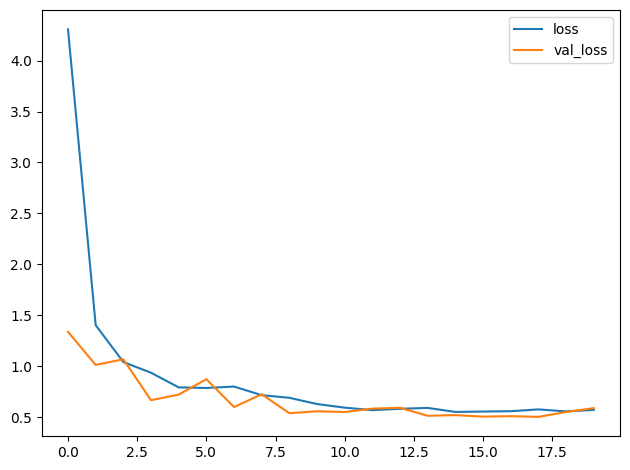

In [71]:
import pandas as pd

# Convertim a DataFrame
history_df = pd.DataFrame(history.history)
# Utilitzem el mètode plot de Pandas
history_df['loss'].plot(legend=True);
history_df['val_loss'].plot(legend=True);

Observeu com la pèrdua (`loss`) s'aproxima a un valor límit a mesura que passen les `epochs`. Quan la corba de pèrdua es torna horitzontal (o quasi), vol dir que el model ha après tot el que pot de les dades i no hi ha motiu per continuar amb `epochs` addicionals. Si encara està convergint, necessitaria més èpoques.

#### Fem prediccions

Una vegada entrenada la xarxa, podem fer prediccions amb ella i calcular el MAE, que ha de coincidir amb el de la última `epoch` de l'entrenament. Esta etapa és tal qual com la feiem amb els algorismes de ML i sklearn a l'apartat anterior.

In [72]:
from sklearn.metrics import mean_absolute_error

# Fes prediccions
sample_X_test = X_test.sample(n=5)
sample_y_pred = model.predict(sample_X_test)
sample_y_real = y_test[sample_X_test.index]
print(f"Valors predits\n: {sample_y_pred}")
print(f"\n\nValors reals\n: {y_test[sample_X_test.index]}")
mae = mean_absolute_error(sample_y_real, sample_y_pred)


# Calcula l'Error Mitjà Absolut (MAE)
# y_pred = model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)

print(f"\n\nMAE: {mae}")

1/1 [==============================] - 0s 68ms/step


Valors predits
: [[5.3805923]
 [4.701145 ]
 [4.9760203]
 [5.100591 ]
 [4.76225  ]]


Valors reals
: 1554    6
202     5
1378    6
979     5
124     5
Name: quality, dtype: int64


MAE: 0.4561166763305664


#### Parada anticipada

Ara augmentem la capacitat de la xarxa. Anirem a buscar una xarxa bastant gran, però confiem en el `callback` per aturar la formació quan la pèrdua de validació mostre signes d'augment.

In [73]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# model = keras.Sequential([
#     layers.Dense(512, activation='relu', input_shape=[11]),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(1),
# ])
# model.compile(
#     optimizer='adam',
#     loss='mae',
# )

Després de definir la funció de `callback`, afegiu-la com a argument a l'ajust (podeu tindre'n vàries, així que poseu-la en una llista). Trieu un gran nombre d'èpoques quan utilitzeu la parada anticipada, més del que necessitareu.

Minimum validation loss: 0.46824437379837036


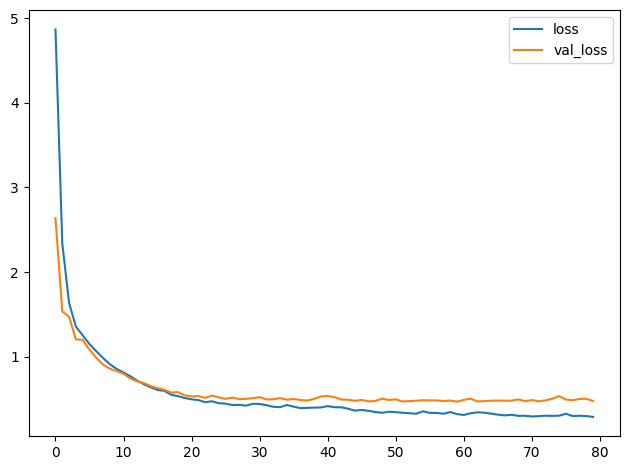

In [74]:
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Com podem observar, Keras ha parat l'entrenament abans d'arribar a les 500 èpoques.

#### Dropdown i batch normalization
Continuem desenvolupant el model de Vi Negre. Ara augmentarem encara més la capacitat, però afegirem l'abandonament per controlar el sobreajust i la normalització del lot per accelerar l'optimització. Aquesta vegada, també deixarem d'estandarditzar les dades, per demostrar com la normalització per lots pot estabilitzar la formació.

In [75]:
import matplotlib.pyplot as plt

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


import pandas as pd
red_wine = pd.read_csv('data/keras/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

Observeu que no hem normalitzat les dades esta vegada.

Quan afegim abandonament, és possible que hàgem d'augmentar el nombre d'unitats a les vostres capes denses.

In [76]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

No hi ha res a canviar en la configuració de l'entrenement.

<Axes: >

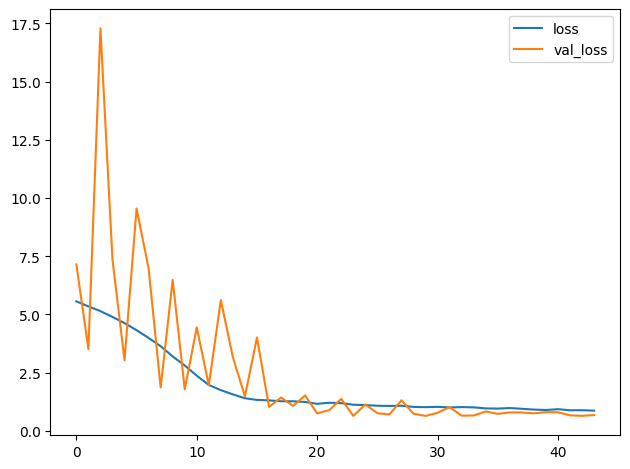

In [77]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=1000,
    verbose=0,
    callbacks=[early_stopping],
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [78]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.6373770236968994


### Exemple II: Classificació binària - Detecció d'objectes a la ionosfera
Fins ara, hem aprés com les xarxes neuronals poden resoldre problemes de regressió. Ara aplicarem les xarxes neuronals a un altre problema comú d'aprenentatge automàtic: la classificació. La majoria de tot el que hem aprés fins ara encara s'aplica.
La diferència principal està en la funció de pèrdua que fem servir i en quin tipus d'eixida volem que produïsca la capa final.



#### Precisió (Accuracy) i entropia creuada (Cross-Entropy)
La precisió és una de les moltes mètriques que s'utilitzen per mesurar l'èxit en un problema de classificació. La precisió és la relació entre les prediccions correctes i les prediccions totals: $$precisió = correctes / total$$. 

Un model que sempre prediu correctament tindria una puntuació de precisió d'1,0. En igualtat de condicions, la precisió és una mètrica raonable per utilitzar sempre que les classes del conjunt de dades es produeixen amb la mateixa freqüència aproximadament.

El problema de la precisió (i de la majoria de les altres mètriques de classificació) és que no es pot utilitzar com a funció de pèrdua. Les raons són:
- **No és continua, per tant no es pot calcular el seu gradient**: L’exactitud és una funció de pas, que significa que té un valor constant dins d’un cert interval i després salta a un altre valor. Això fa que no tingui un gradient, que és necessari per a l’optimització basada en el gradient, com ara la retropropagació utilitzada en les xarxes neuronals.
- **No proporciona una bona indicació de la confiança del model**: L’exactitud només ens diu la fracció de prediccions correctes, però no ens diu res sobre la confiança del model en aquestes prediccions. Per exemple, un model pot estar molt segur d’una predicció incorrecta i això no es reflectiria en l’exactitud.
- **No és sensible al desequilibri de classes**: Si tenim un conjunt de dades amb un gran desequilibri de classes, on la majoria de les mostres pertanyen a una classe, un model podria obtenir una alta exactitud simplement preveient sempre la classe majoritària. No obstant això, això no seria útil si estem interessats en la classificació correcta de la classe minoritària.

SGD necessita una funció de pèrdua que canvie de forma contínua, però la precisió, sent una proporció de recomptes, canvia a "bots". Per tant, hem de triar un substitut que actue com a funció de pèrdua. Aquest substitut pot ser la funció d'entropia creuada, encara que podrien ser altres com la pèrdua logística, per exemple.

Ara, recordeu que la funció de pèrdua defineix l'objectiu de la xarxa durant l'entrenament. Amb la regressió, el nostre objectiu era minimitzar la distància entre el resultat esperat i el resultat previst. Vam escollir MAE per mesurar aquesta distància.

Per a la classificació, el que volem és una distància entre probabilitats, i això és el que proporciona l'entropia creuada. L'entropia creuada és una mesura de la distància d'una distribució de probabilitat a una altra, la distància entre les probabilitats predites i les etiquestes reals.

![cross-entropy.png](../img/keras/cross-entropy.png)
</figurecaption>L'entropia creuada penalitza la probabilitat de prediccions incorrectes<figurecaption>

La idea és que volem que la nostra xarxa prediga la classe correcta amb una probabilitat 1.0. Com més lluny siga la probabilitat prevista d'1,0, més gran serà la pèrdua d'entropia creuada.

Les raons tècniques per les quals utilitzem l'entropia creuada són un poc subtils, però les principals idees són que:
- utilitzem l'entropia creuada per a una pèrdua de classificació
- altres mètriques que ens poden interessar, com ara la precisió (*accuracy*), tendiran a millorar en millorar l'entropia creuada.

#### Predicció de probabilitats amb la funció sigmoide
Les funcions d'entropia creuada i de precisió requereixen probabilitats com a entrades, és a dir, números del 0 a l'1. Per produir eixides de valor real produïdes per una capa densa en probabilitats, estudiem un nou tipus de funció d'activació, l'activació sigmoide.

![Sigmoide](../img/keras/sigmoide.png)
</figurecaption>La funció sigmoide transforma valors reals a valors entre 0 i 1<figurecaption>

Per obtenir la predicció final de classe, definim un llindar de probabilitat. Normalment serà 0,5, de manera que l'arrodoniment ens donarà la classe correcta: per davall de 0,5 significa que etiquetem la classe amb l'etiqueta 0 i 0,5 o superior significa classe amb l'etiqueta 1. El llindar de 0,5 és el que Keras utilitza per defecte amb la seua mètrica de precisió.

#### Preparem les dades
[El dataset de la ionosfera](https://archive.ics.uci.edu/dataset/52/ionosphere) conté característiques obtingudes a partir de sensors situats a la ionosfera sobre l'atmosfera terrestre. L'objectiu és determinar si els senyals mostren la presència d'algun objecte o només aire.

[Baixa't el csv d'ací](../data/keras/ion.csv)

In [1]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('data/keras/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1}) # Dades categòriques a enter

df_train = df.sample(frac=0.7,random_state=0) # Altra forma de fer la separació entra train i test
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_) # Min-Max escaler
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


#### Definim la xarxa neuronal
Tindrem 33 entrades, ja que tenim 33 característiques al dataset, i l'última capa serà una sigmoide, ja que estem davant un problema de classificació binària. Per a les capes d'entrada i intermèdia, definim 4 neurones en cadascuna.

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(24, activation='relu', input_shape=[33]),
    layers.Dense(12, activation='relu'),  
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

#### Compilem
Definim l'optimitzador `adam`, la funció de pèrdua com a `binary_crossentropy` i mètrica `binary_accuracy`, que calcula la freqüència amb què les prediccions coincideixen amb les etiquetes.

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

#### Early stopping i entrenament
El model d'aquest problema en particular pot trigar unes quantes èpoques a completar l'entrenament, de manera que inclourem una devolució de trucada d'aturada anticipada per comoditat.

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

#### Corbes d'aprenentatge
Ens fixem en les corbes d'aprenentatge com sempre i també inspeccionarem els millors valors per a la pèrdua i la precisió que tenim al conjunt de validació. Recordeu que la parada anticipada restaurarà els pesos què han obtingut aquests valors (`restore_best_weights=True`).

Millor Validation Loss: 0.2641
Millor Validation Accuracy: 0.9238


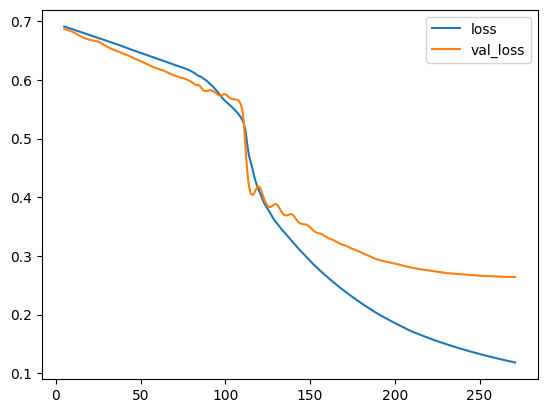

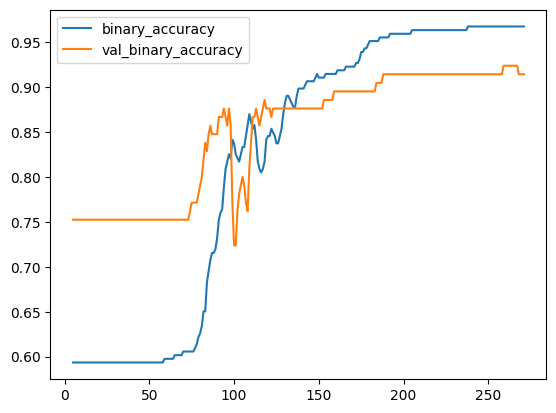

In [18]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Millor Validation Loss: {:0.4f}" +\
      "\nMillor Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))


### Annex. Optimitzadors i Funcions de Pèrdua en Xarxes Neuronals.

Una gran pregunta és saber cada tipus de optimitzador i funció de pèrdua en quins escenaris es fa servir.

**Optimitzadors:**

1. Adam:
   - Adam (Adaptive Moment Estimation) és un optimitzador popular que combina les idees dels mètodes de momentum i RMSProp.
   - S'adapta dinàmicament a les taxes d'aprenentatge per a cada paràmetre.
   - És àmpliament utilitzat en una varietat de problemes a causa de la seva eficàcia i rapidesa de convergència.
   - Adequat per a problemes de regressió i classificació en conjunts de dades grans i complexos.

2. SGD (Stochastic Gradient Descent):
   - SGD és l'optimitzador bàsic utilitzat en moltes implementacions de xarxes neuronals.
   - Actualitza els paràmetres en la direcció contrària al gradient de la funció de pèrdua.
   - Pot ser útil per a problemes simples o quan es desitja un control més precís sobre l'actualització de paràmetres.
   - Adequat per a problemes de regressió i classificació, especialment en conjunts de dades petits o quan es necessiten solucions més interpretables.

3. RMSProp (Root Mean Square Propagation):
   - RMSProp és un optimitzador que adapta les taxes d'aprenentatge per a cada paràmetre en funció de l'històric de gradients.
   - És útil per a mitigar el problema dels canvis d'escala en les variables i accelerar la convergència.
   - Adequat per a problemes de classificació i regressió en els quals es vol controlar la velocitat d'aprenentatge de forma adaptativa.

**Funcions de Pèrdua:**

1. MAE (Mean Absolute Error):
   - MAE calcula la diferència absoluta entre les prediccions i les etiquetes veritables i després pren la mitjana d'aquestes diferències.
   - És menys sensible als valors atípics que l'error quadràtic mitjà (MSE).
   - Es pot utilitzar en problemes de regressió quan es desitja una mètrica d'error més robusta davant valors atípics.

2. MSE (Mean Squared Error):
   - MSE calcula la diferència quadràtica entre les prediccions i les etiquetes veritables i després pren la mitjana d'aquestes diferències.
   - Penalitza més fortament els errors grans a causa de l'operació d'elevació al quadrat.
   - És comú en problemes de regressió quan es vol penalitzar els errors grans de manera significativa.

3. Binary Crossentropy:
   - Binary Crossentropy és una funció de pèrdua utilitzada en problemes de classificació binària.
   - Calcula la pèrdua logarítmica entre les prediccions i les etiquetes veritables.
   - Adequat per a problemes de classificació binària quan es vol optimitzar la probabilitat que una instància pertanyi a una classe específica.

4. Categorical Crossentropy:
   - Categorical Crossentropy és similar a la Binary Crossentropy, però s'utilitza en problemes de classificació amb més de dues classes.
   - Calcula la pèrdua logarítmica entre les prediccions i les etiquetes veritables per a cada classe.
   - Adequat per a problemes de classificació multiclasse on es vol optimitzar la probabilitat de cada classe.